<a href="https://colab.research.google.com/github/mrsb10/Number-extraction-from-image---IDEATEC/blob/main/number_from_image1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving test_img3.png to test_img3 (2).png


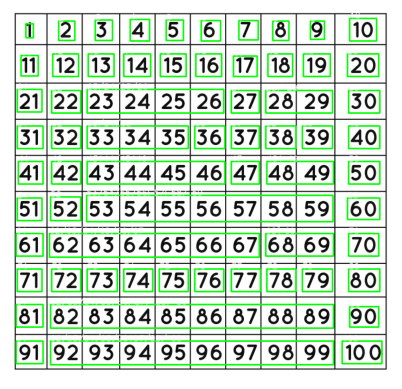

Extracted Numbers: 1234567891011121314151617181920212223242526272829303132333435363738394041424314445146474814950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495961979899100


In [ ]:
!pip install easyocr

import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    IMAGE_PATH = filename

reader = easyocr.Reader(['en'])

img = cv2.imread(IMAGE_PATH)

if img is None:
    print("Error: Could not read the image.")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    result = reader.readtext(thresh)

    extracted_numbers = ""

    for (bbox, text, prob) in result:
        top_left = tuple(int(coord) for coord in bbox[0])
        bottom_right = tuple(int(coord) for coord in bbox[2])

        cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

        img = cv2.putText(img, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

        extracted_numbers += ''.join(c for c in text if c.isdigit())

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    print("Extracted Numbers:", extracted_numbers)